In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import time
import h5py
import os,sys
import numpy as np
import matplotlib.pyplot as plt

In [3]:
DSPACK_HOME=os.environ.get("DSPACK_HOME")
if DSPACK_HOME not in sys.path:
    sys.path.append(DSPACK_HOME)

In [4]:
import scripts.fsystem
import scripts.statistics

In [5]:
workdir = "/reg/data/ana03/scratch/zhensu/Experiment/ICH/20201225/"
dnames = ["WT-1", "WT-2", "WT-3", "G150A-1", "G150A-2", "G150A-3", "G150T-1", "G150T-2", "G150T-3"]

In [6]:
colors = ["tab:blue","tab:orange","tab:green"]
resolution_A = np.around(1./np.linspace(0.1,1./1.4,5),1)

In [8]:
stats = {}
for dname in dnames:
    stats[dname] = {}
    path_dsdata = "%s/data/%s/standard_clean_data_scale_profile_with_pca_map1.dsdata"%(workdir,dname)
    path_phenix = scripts.fsystem.H5manager.reader(path_dsdata,"phenix_merge_stats")
    with h5py.File(path_phenix,"r") as f:
        phenix_rmax_A_curve = f["phenix_rmax_A_curve"][()]
        phenix_rmin_A_curve = f["phenix_rmin_A_curve"][()]
        res_curve_invA = (1./phenix_rmax_A_curve + 1./phenix_rmin_A_curve)/2.
        stats[dname] = (res_curve_invA, f["phenix_cc12_curve"][()])

dpi =  600


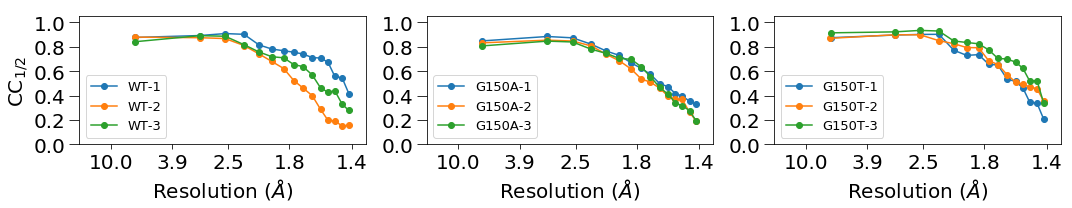

In [9]:
plt.figure(figsize=(15,3))

####################################
plt.subplot(1,3,1)
for idx, dname in enumerate(dnames[0:3]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])
    
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.ylabel("CC$_{1/2}$",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
####################################
plt.subplot(1,3,2)
for idx, dname in enumerate(dnames[3:6]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
####################################
plt.subplot(1,3,3)
for idx, dname in enumerate(dnames[6:9]):
    plt.plot(10*stats[dname][0], stats[dname][1], "-o",label=dname,c=colors[idx])
plt.legend(loc=3,fontsize=13)
plt.xlim(0.2,7.5)
plt.ylim(0.,1.05)
plt.xlabel("Resolution ($\AA$)",fontsize=20)
plt.xticks(10./resolution_A, resolution_A,fontsize=20)
plt.yticks(fontsize=20)
plt.tick_params('y', length=10,  which='major')
plt.tick_params('x', length=5, which='major')
plt.tight_layout()
####################################
fig = plt.gcf()
max_fit_dpi = min(int(np.sqrt(25.*1024**2/np.prod(fig.get_size_inches()))),600)
print "dpi = ", max_fit_dpi
plt.tight_layout()
plt.savefig("./600dpi/Fig_06_CC12.jpg",dpi=600,bbox_inches='tight',pad_inches=0,transparent=True)
plt.savefig("./fitgdoc/Fig_06_CC12.jpg",dpi=max_fit_dpi,bbox_inches='tight',pad_inches=0,transparent=True)
plt.show()